### GridsearchCV

Performs hyperparameteroptimization even on estimators that don't have a *CV version.

In [28]:
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd

wine = load_wine()

wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [29]:
from sklearn.model_selection import train_test_split

X, y = wine.data, wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

### Pipeline
Set up a pipeline for execution inside gridsearchCV object.

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

scaler = StandardScaler()

pipe_KNN = Pipeline([('scaler', scaler), ('knn', KNeighborsClassifier())])

pipe_log = make_pipeline(scaler, LogisticRegression(penalty = "elasticnet", solver = "saga", max_iter=10000))

pipe_forest = Pipeline([('forest', RandomForestClassifier())])

params_knn = {'knn__n_neighbors': list(range(1, 50))}
params_log = {'logisticregression__l1_ratio': np.linspace(0, 1, 20)}
params_forest = {'forest__n_estimators': list(range(50, 200, 10))}

classifier_KNN = GridSearchCV(estimator=pipe_KNN, param_grid=params_knn, cv=5, scoring='accuracy')
classifier_log = GridSearchCV(estimator=pipe_log, param_grid=params_log, cv=5, scoring='accuracy')
classifier_forest = GridSearchCV(estimator=pipe_forest, param_grid=params_forest, cv=5, scoring='accuracy')

Train the classifiers on the training data. 

In [31]:
classifier_KNN.fit(X_train, y_train)
classifier_log.fit(X_train, y_train)
classifier_forest.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('forest', RandomForestClassifier())]),
             param_grid={'forest__n_estimators': [50, 60, 70, 80, 90, 100, 110,
                                                  120, 130, 140, 150, 160, 170,
                                                  180, 190]},
             scoring='accuracy')

In [32]:
# classifier_KNN.best_params_
# classifier_log.best_params_
classifier_forest.best_params_

{'forest__n_estimators': 70}

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        33
           1       1.00      0.85      0.92        34
           2       0.96      1.00      0.98        22

    accuracy                           0.94        89
   macro avg       0.95      0.95      0.95        89
weighted avg       0.95      0.94      0.94        89



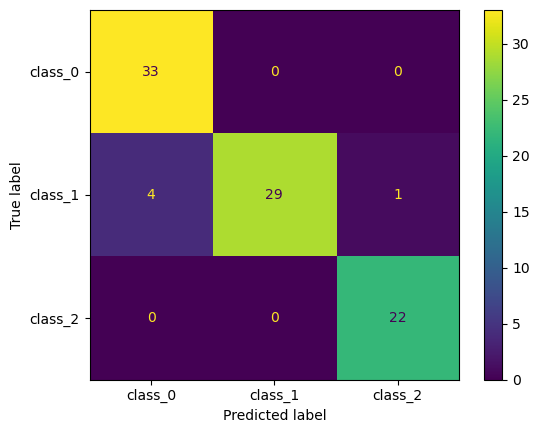

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred_KNN = classifier_KNN.predict(X_test)
print(classification_report(y_test, y_pred_KNN))
cm = confusion_matrix(y_test, y_pred_KNN)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names)
disp.plot()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        22

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89



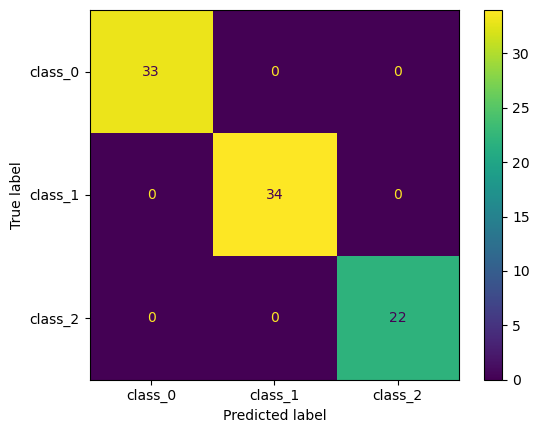

In [34]:
y_pred_log = classifier_log.predict(X_test)
print(classification_report(y_test, y_pred_log))
cm = confusion_matrix(y_test, y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names)
disp.plot()

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.94      1.00      0.97        34
           2       1.00      1.00      1.00        22

    accuracy                           0.98        89
   macro avg       0.98      0.98      0.98        89
weighted avg       0.98      0.98      0.98        89



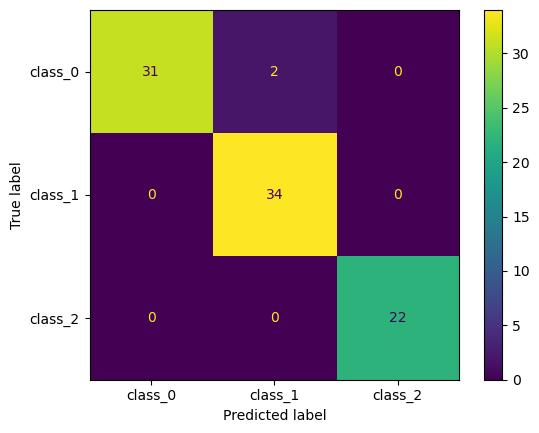

In [35]:
y_pred_forest = classifier_forest.predict(X_test)
print(classification_report(y_test, y_pred_forest))
cm = confusion_matrix(y_test, y_pred_forest)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names)
disp.plot()

In [40]:
import joblib

joblib.dump(classifier_log, 'production_model.joblib')

my_model = joblib.load('production_model.joblib')

my_model.predict(X_test)

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0,
       0, 2, 0, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2,
       1])